In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

In [3]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [4]:
#data cleaning
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset.fillna(method='ffill',inplace = True) #replace nan value by replaching exhisting prev value
#dataset.dropna(how='any',inplace=True)

In [5]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [6]:
dataset=d
dataset.to_csv('loan-prediction1.csv',index=False)

In [7]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
#split the data set for training and testing
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017) #random state=same seed

In [8]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [9]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [10]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

Training set score rf_g_n: 1.000000
Test set score rf_g_n: 0.762162
Total score rf_g_n: 0.928339
Classification report for rf_g_n:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49        56
           1       0.77      0.93      0.85       129

   micro avg       0.76      0.76      0.76       185
   macro avg       0.74      0.65      0.67       185
weighted avg       0.75      0.76      0.74       185


Confusion matrix for rf_g_n on test:
[[ 21  35]
 [  9 120]]
Classification report for rf_g_n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_g_n on train:
[[136   0]
 [  0 293]]
Classification report for rf_g_n:
              precision 

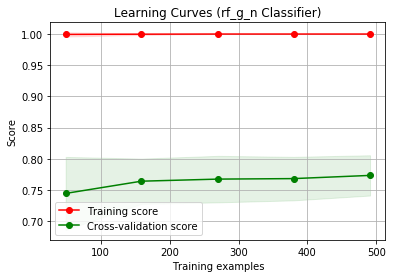

In [11]:
rf_g_n = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=5,max_features=None)
rf_g_n.fit(X_train_std, y_train)

print("Training set score rf_g_n: %f" % rf_g_n.score(X_train_std, y_train))
print("Test set score rf_g_n: %f" % rf_g_n.score(X_test_std, y_test))
print("Total score rf_g_n: %f" % rf_g_n.score(X_std, y))

print("Classification report for rf_g_n:\n%s\n"% (classification_report(y_test, rf_g_n.predict(X_test_std))))
print("Confusion matrix for rf_g_n on test:\n%s" % (confusion_matrix(y_test, rf_g_n.predict(X_test_std))))

print("Classification report for rf_g_n:\n%s\n"% (classification_report(y_train, rf_g_n.predict(X_train_std))))
print("Confusion matrix for rf_g_n on train:\n%s" % (confusion_matrix(y_train, rf_g_n.predict(X_train_std))))

print("Classification report for rf_g_n:\n%s\n"% (classification_report(y, rf_g_n.predict(X_std))))
print("Confusion matrix for rf_g_n on total:\n%s" % (confusion_matrix(y, rf_g_n.predict(X_std))))

cvs=cross_val_score(rf_g_n , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_g_n,"Learning Curves (rf_g_n Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_g_l: 1.000000
Test set score rf_g_l: 0.783784
Total score rf_g_l: 0.934853
Classification report for rf_g_l:
              precision    recall  f1-score   support

           0       0.81      0.38      0.51        56
           1       0.78      0.96      0.86       129

   micro avg       0.78      0.78      0.78       185
   macro avg       0.79      0.67      0.69       185
weighted avg       0.79      0.78      0.76       185


Confusion matrix for rf_g_l on test:
[[ 21  35]
 [  5 124]]
Classification report for rf_g_l:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_g_l on train:
[[136   0]
 [  0 293]]
Classification report for rf_g_l:
              precision 

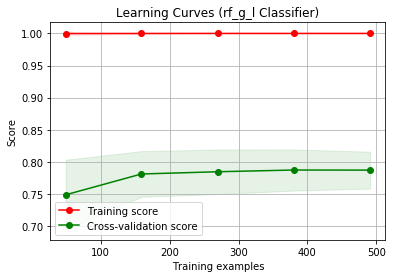

In [12]:
rf_g_l = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=5,max_features='log2')
rf_g_l.fit(X_train_std, y_train)

print("Training set score rf_g_l: %f" % rf_g_l.score(X_train_std, y_train))
print("Test set score rf_g_l: %f" % rf_g_l.score(X_test_std, y_test))
print("Total score rf_g_l: %f" % rf_g_l.score(X_std, y))

print("Classification report for rf_g_l:\n%s\n"% (classification_report(y_test, rf_g_l.predict(X_test_std))))
print("Confusion matrix for rf_g_l on test:\n%s" % (confusion_matrix(y_test, rf_g_l.predict(X_test_std))))

print("Classification report for rf_g_l:\n%s\n"% (classification_report(y_train, rf_g_l.predict(X_train_std))))
print("Confusion matrix for rf_g_l on train:\n%s" % (confusion_matrix(y_train, rf_g_l.predict(X_train_std))))

print("Classification report for rf_g_l:\n%s\n"% (classification_report(y, rf_g_l.predict(X_std))))
print("Confusion matrix for rf_g_l on total:\n%s" % (confusion_matrix(y, rf_g_l.predict(X_std))))

cvs=cross_val_score(rf_g_l , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_g_l,"Learning Curves (rf_g_l Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_g_s: 1.000000
Test set score rf_g_s: 0.783784
Total score rf_g_s: 0.934853
Classification report for rf_g_s:
              precision    recall  f1-score   support

           0       0.81      0.38      0.51        56
           1       0.78      0.96      0.86       129

   micro avg       0.78      0.78      0.78       185
   macro avg       0.79      0.67      0.69       185
weighted avg       0.79      0.78      0.76       185


Confusion matrix for rf_g_s on test:
[[ 21  35]
 [  5 124]]
Classification report for rf_g_s:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_g_s on train:
[[136   0]
 [  0 293]]
Classification report for rf_g_s:
              precision 

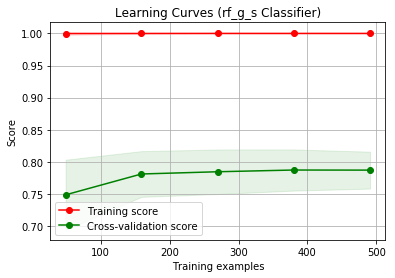

In [13]:
rf_g_s = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=5,max_features='sqrt')
rf_g_s.fit(X_train_std, y_train)

print("Training set score rf_g_s: %f" % rf_g_s.score(X_train_std, y_train))
print("Test set score rf_g_s: %f" % rf_g_s.score(X_test_std, y_test))
print("Total score rf_g_s: %f" % rf_g_s.score(X_std, y))

print("Classification report for rf_g_s:\n%s\n"% (classification_report(y_test, rf_g_s.predict(X_test_std))))
print("Confusion matrix for rf_g_s on test:\n%s" % (confusion_matrix(y_test, rf_g_s.predict(X_test_std))))

print("Classification report for rf_g_s:\n%s\n"% (classification_report(y_train, rf_g_s.predict(X_train_std))))
print("Confusion matrix for rf_g_s on train:\n%s" % (confusion_matrix(y_train, rf_g_s.predict(X_train_std))))

print("Classification report for rf_g_s:\n%s\n"% (classification_report(y, rf_g_s.predict(X_std))))
print("Confusion matrix for rf_g_s on total:\n%s" % (confusion_matrix(y, rf_g_s.predict(X_std))))

cvs=cross_val_score(rf_g_s , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_g_s,"Learning Curves (rf_g_s Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_g_a: 1.000000
Test set score rf_g_a: 0.783784
Total score rf_g_a: 0.934853
Classification report for rf_g_a:
              precision    recall  f1-score   support

           0       0.81      0.38      0.51        56
           1       0.78      0.96      0.86       129

   micro avg       0.78      0.78      0.78       185
   macro avg       0.79      0.67      0.69       185
weighted avg       0.79      0.78      0.76       185


Confusion matrix for rf_g_a on test:
[[ 21  35]
 [  5 124]]
Classification report for rf_g_a:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_g_a on train:
[[136   0]
 [  0 293]]
Classification report for rf_g_a:
              precision 

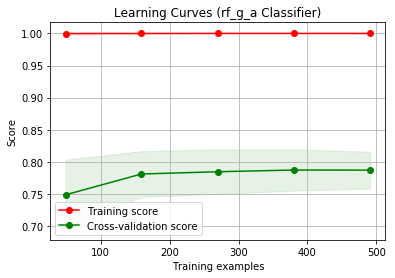

In [14]:
rf_g_a = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=5,max_features='auto')
rf_g_a.fit(X_train_std, y_train)

print("Training set score rf_g_a: %f" % rf_g_a.score(X_train_std, y_train))
print("Test set score rf_g_a: %f" % rf_g_a.score(X_test_std, y_test))
print("Total score rf_g_a: %f" % rf_g_a.score(X_std, y))

print("Classification report for rf_g_a:\n%s\n"% (classification_report(y_test, rf_g_a.predict(X_test_std))))
print("Confusion matrix for rf_g_a on test:\n%s" % (confusion_matrix(y_test, rf_g_a.predict(X_test_std))))

print("Classification report for rf_g_a:\n%s\n"% (classification_report(y_train, rf_g_a.predict(X_train_std))))
print("Confusion matrix for rf_g_a on train:\n%s" % (confusion_matrix(y_train, rf_g_a.predict(X_train_std))))

print("Classification report for rf_g_a:\n%s\n"% (classification_report(y, rf_g_a.predict(X_std))))
print("Confusion matrix for rf_g_a on total:\n%s" % (confusion_matrix(y, rf_g_a.predict(X_std))))

cvs=cross_val_score(rf_g_a , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_g_a,"Learning Curves (rf_g_a Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_e_n: 1.000000
Test set score rf_e_n: 0.778378
Total score rf_e_n: 0.933225
Classification report for rf_e_n:
              precision    recall  f1-score   support

           0       0.78      0.38      0.51        56
           1       0.78      0.95      0.86       129

   micro avg       0.78      0.78      0.78       185
   macro avg       0.78      0.66      0.68       185
weighted avg       0.78      0.78      0.75       185


Confusion matrix for rf_e_n on test:
[[ 21  35]
 [  6 123]]
Classification report for rf_e_n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_e_n on train:
[[136   0]
 [  0 293]]
Classification report for rf_e_n:
              precision 

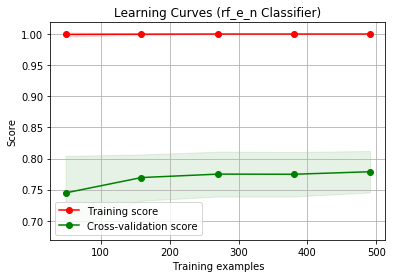

In [15]:
rf_e_n = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features=None)
rf_e_n.fit(X_train_std, y_train)

print("Training set score rf_e_n: %f" % rf_e_n.score(X_train_std, y_train))
print("Test set score rf_e_n: %f" % rf_e_n.score(X_test_std, y_test))
print("Total score rf_e_n: %f" % rf_e_n.score(X_std, y))

print("Classification report for rf_e_n:\n%s\n"% (classification_report(y_test, rf_e_n.predict(X_test_std))))
print("Confusion matrix for rf_e_n on test:\n%s" % (confusion_matrix(y_test, rf_e_n.predict(X_test_std))))

print("Classification report for rf_e_n:\n%s\n"% (classification_report(y_train, rf_e_n.predict(X_train_std))))
print("Confusion matrix for rf_e_n on train:\n%s" % (confusion_matrix(y_train, rf_e_n.predict(X_train_std))))

print("Classification report for rf_e_n:\n%s\n"% (classification_report(y, rf_e_n.predict(X_std))))
print("Confusion matrix for rf_e_n on total:\n%s" % (confusion_matrix(y, rf_e_n.predict(X_std))))

cvs=cross_val_score(rf_e_n , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_e_n,"Learning Curves (rf_e_n Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_e_l: 1.000000
Test set score rf_e_l: 0.772973
Total score rf_e_l: 0.931596
Classification report for rf_e_l:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49        56
           1       0.77      0.95      0.85       129

   micro avg       0.77      0.77      0.77       185
   macro avg       0.77      0.66      0.67       185
weighted avg       0.77      0.77      0.74       185


Confusion matrix for rf_e_l on test:
[[ 20  36]
 [  6 123]]
Classification report for rf_e_l:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_e_l on train:
[[136   0]
 [  0 293]]
Classification report for rf_e_l:
              precision 

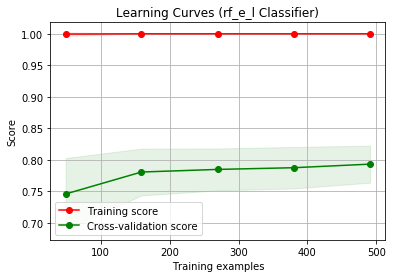

In [16]:
rf_e_l = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features='log2')
rf_e_l.fit(X_train_std, y_train)

print("Training set score rf_e_l: %f" % rf_e_l.score(X_train_std, y_train))
print("Test set score rf_e_l: %f" % rf_e_l.score(X_test_std, y_test))
print("Total score rf_e_l: %f" % rf_e_l.score(X_std, y))

print("Classification report for rf_e_l:\n%s\n"% (classification_report(y_test, rf_e_l.predict(X_test_std))))
print("Confusion matrix for rf_e_l on test:\n%s" % (confusion_matrix(y_test, rf_e_l.predict(X_test_std))))

print("Classification report for rf_e_l:\n%s\n"% (classification_report(y_train, rf_e_l.predict(X_train_std))))
print("Confusion matrix for rf_e_l on train:\n%s" % (confusion_matrix(y_train, rf_e_l.predict(X_train_std))))

print("Classification report for rf_e_l:\n%s\n"% (classification_report(y, rf_e_l.predict(X_std))))
print("Confusion matrix for rf_e_l on total:\n%s" % (confusion_matrix(y, rf_e_l.predict(X_std))))

cvs=cross_val_score(rf_e_l , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_e_l,"Learning Curves (rf_e_l Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_e_s: 1.000000
Test set score rf_e_s: 0.772973
Total score rf_e_s: 0.931596
Classification report for rf_e_s:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49        56
           1       0.77      0.95      0.85       129

   micro avg       0.77      0.77      0.77       185
   macro avg       0.77      0.66      0.67       185
weighted avg       0.77      0.77      0.74       185


Confusion matrix for rf_e_s on test:
[[ 20  36]
 [  6 123]]
Classification report for rf_e_s:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_e_s on train:
[[136   0]
 [  0 293]]
Classification report for rf_e_s:
              precision 

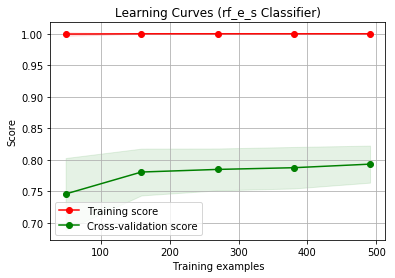

In [17]:
rf_e_s = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features='sqrt')
rf_e_s.fit(X_train_std, y_train)

print("Training set score rf_e_s: %f" % rf_e_s.score(X_train_std, y_train))
print("Test set score rf_e_s: %f" % rf_e_s.score(X_test_std, y_test))
print("Total score rf_e_s: %f" % rf_e_s.score(X_std, y))

print("Classification report for rf_e_s:\n%s\n"% (classification_report(y_test, rf_e_s.predict(X_test_std))))
print("Confusion matrix for rf_e_s on test:\n%s" % (confusion_matrix(y_test, rf_e_s.predict(X_test_std))))

print("Classification report for rf_e_s:\n%s\n"% (classification_report(y_train, rf_e_s.predict(X_train_std))))
print("Confusion matrix for rf_e_s on train:\n%s" % (confusion_matrix(y_train, rf_e_s.predict(X_train_std))))

print("Classification report for rf_e_s:\n%s\n"% (classification_report(y, rf_e_s.predict(X_std))))
print("Confusion matrix for rf_e_s on total:\n%s" % (confusion_matrix(y, rf_e_s.predict(X_std))))

cvs=cross_val_score(rf_e_s , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_e_s,"Learning Curves (rf_e_s Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score rf_e_a: 1.000000
Test set score rf_e_a: 0.783784
Total score rf_e_a: 0.934853
Classification report for rf_e_a:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49        56
           1       0.77      0.95      0.85       129

   micro avg       0.77      0.77      0.77       185
   macro avg       0.77      0.66      0.67       185
weighted avg       0.77      0.77      0.74       185


Confusion matrix for rf_e_a on test:
[[ 20  36]
 [  6 123]]
Classification report for rf_e_a:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for rf_e_a on train:
[[136   0]
 [  0 293]]
Classification report for rf_e_a:
              precision 

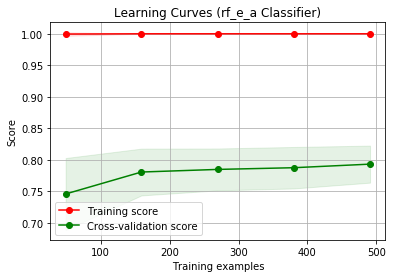

In [18]:
rf_e_a = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features='auto')
rf_e_a.fit(X_train_std, y_train)

print("Training set score rf_e_a: %f" % rf_g_a.score(X_train_std, y_train))
print("Test set score rf_e_a: %f" % rf_g_a.score(X_test_std, y_test))
print("Total score rf_e_a: %f" % rf_g_a.score(X_std, y))

print("Classification report for rf_e_a:\n%s\n"% (classification_report(y_test, rf_e_a.predict(X_test_std))))
print("Confusion matrix for rf_e_a on test:\n%s" % (confusion_matrix(y_test, rf_e_a.predict(X_test_std))))

print("Classification report for rf_e_a:\n%s\n"% (classification_report(y_train, rf_e_a.predict(X_train_std))))
print("Confusion matrix for rf_e_a on train:\n%s" % (confusion_matrix(y_train, rf_e_a.predict(X_train_std))))

print("Classification report for rf_e_a:\n%s\n"% (classification_report(y, rf_e_a.predict(X_std))))
print("Confusion matrix for rf_e_a on total:\n%s" % (confusion_matrix(y, rf_e_a.predict(X_std))))

cvs=cross_val_score(rf_e_a , X_std, y, cv=10)
print(cvs)

plot_learning_curve(rf_e_a,"Learning Curves (rf_e_a Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

In [19]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


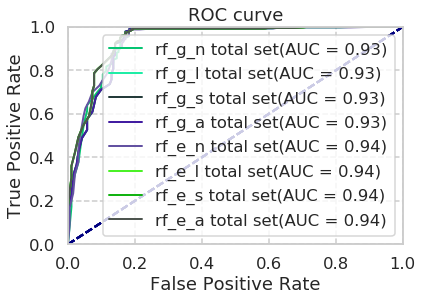

In [20]:
rf_g_n_pred_total=rf_g_n.predict(X_std)
rf_g_l_pred_total=rf_g_l.predict(X_std)
rf_g_s_pred_total=rf_g_s.predict(X_std)
rf_g_a_pred_total=rf_g_a.predict(X_std)
rf_e_n_pred_total=rf_e_n.predict(X_std)
rf_e_l_pred_total=rf_e_l.predict(X_std)
rf_e_s_pred_total=rf_e_s.predict(X_std)
rf_e_a_pred_total=rf_e_a.predict(X_std)

rf_g_n_pred_proba_total=rf_g_n.predict_proba(X_std)[:,1]
rf_g_l_pred_proba_total=rf_g_l.predict_proba(X_std)[:,1]
rf_g_s_pred_proba_total=rf_g_s.predict_proba(X_std)[:,1]
rf_g_a_pred_proba_total=rf_g_a.predict_proba(X_std)[:,1]
rf_e_n_pred_proba_total=rf_e_n.predict_proba(X_std)[:,1]
rf_e_l_pred_proba_total=rf_e_l.predict_proba(X_std)[:,1]
rf_e_s_pred_proba_total=rf_e_s.predict_proba(X_std)[:,1]
rf_e_a_pred_proba_total=rf_e_a.predict_proba(X_std)[:,1]

plotAUC(y,rf_g_n_pred_proba_total,'rf_g_n total set')
plotAUC(y,rf_g_l_pred_proba_total,'rf_g_l total set')
plotAUC(y,rf_g_s_pred_proba_total,'rf_g_s total set')
plotAUC(y,rf_g_a_pred_proba_total,'rf_g_a total set')
plotAUC(y,rf_e_n_pred_proba_total,'rf_e_n total set')
plotAUC(y,rf_e_l_pred_proba_total,'rf_e_l total set')
plotAUC(y,rf_e_s_pred_proba_total,'rf_e_s total set')
plotAUC(y,rf_e_a_pred_proba_total,'rf_e_a total set')


plt.show()

In [21]:
#storing all models
from sklearn.externals import joblib #dumping and loading model

joblib.dump(rf_g_n,'rf_g_n_model.joblib')
joblib.dump(rf_g_l,'rf_g_l_model.joblib')
joblib.dump(rf_g_s,'rf_g_s_model.joblib')
joblib.dump(rf_g_a,'rf_g_a_model.joblib')
joblib.dump(rf_e_n,'rf_e_n_model.joblib')
joblib.dump(rf_e_l,'rf_e_l_model.joblib')
joblib.dump(rf_e_s,'rf_e_s_model.joblib')
joblib.dump(rf_e_a,'rf_e_a_model.joblib')

['rf_e_a_model.joblib']